In [8]:
from pymatgen.io.vasp import Xdatcar
from pymatgen.symmetry.groups import SpaceGroup
import numpy as np
from collections import Counter
import tqdm
import matplotlib.pyplot as plt
import yaml

# import sys
# sys.path.insert(0, "../../scripts/")
# from utils import flatten_list, get_structures, indices_by_species

import sys
sys.path.insert(0, "../../scripts/")
from utils import flatten_list, indices_by_species

from scipy.stats import gaussian_kde
from scipy.ndimage.filters import gaussian_filter1d

from site_analysis_functions import (percolating_graph, 
                                     minimum_percolating_graph,
                                     t_all, s_sites,
                                     tetrahedral_site_analysis)

In [2]:
with open('../md_runs.yaml', 'r') as f:
    md_runs = yaml.safe_load(f)
print(md_runs)

{'Li6PS5I': {'0p': [1, 2, 3, 4, 5, 6], '50p': [1, 2, 3, 4, 5, 6, 7], '100p': [1, 2, 3, 4, 5, 6, 7]}, 'Li6PS5Cl': {'0p': [1, 2, 3, 4, 5], '50p': [1, 2, 3, 4, 5, 6], '100p': [1, 2, 3, 4, 5, 6]}}


In [3]:
data_dir = '../../data'

x_spec = {'Li6PS5I': 'I', 'Li6PS5Cl': 'Cl'}

analysis = {}
lattice = {}
for system in md_runs:
    analysis[system] = {}
    lattice[system] = {}
    for disorder, runs in md_runs[system].items():
        xdatcar_filenames = [ f'{data_dir}/{system}/{disorder}/run{i}/inherent_XDATCAR.gz' for i in runs ]
        xdatcars = [ Xdatcar( f ) for f in xdatcar_filenames ]
        structures = flatten_list( [ x.structures for x in xdatcars ] )
        analysis[system][disorder] = tetrahedral_site_analysis( structures, x_spec[system] )
        lattice[system][disorder] = structures[0].lattice

max mapping disp = 0.2557492206222053



max mapping disp = 0.5849922354277903



max mapping disp = 0.4270758927802738



max mapping disp = 0.8905481681525752



max mapping disp = 0.7812197665560381



max mapping disp = 0.6035455650682233


In [100]:
from matplotlib import rcParams

rcParams['font.serif'] = "Iowan Old Style"
rcParams['font.family'] = "serif"
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Iowan Old Style'
rcParams['mathtext.it'] = 'Iowan Old Style:italic'
rcParams['mathtext.bf'] = 'Iowan Old Style:bold'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams.update({'font.size': 20})

In [5]:
from site_analysis_functions import pbc_nearest_point

In [7]:
# system = 'Li6PS5Cl'
# disorder = '0p'

# atoms = { '2': 'Na',
#           '4': 'K',
#           '5': 'Li',
#           '1': 'Cs'}

# a = analysis[system][disorder]
# latt = lattice[system][disorder] 
# from pymatgen import PeriodicSite
# new_sites = []

# for s in a.sites:
#     if s.points:
#         points = np.array([ pbc_nearest_point(s.centre(), p) for p in s.points ])
#         new_sites.append(PeriodicSite(coords=np.mean(points, axis=0), atoms_n_occu=atoms[s.label], lattice=latt))

In [8]:
# an = analysis['Li6PS5Cl']['0p']

In [9]:
# at = np.array(an.atoms_trajectory).flatten()

In [10]:
# Counter([ an.site_by_index(i).label for i in at ])

Counter({'5': 108305, '2': 26083, '1': 11, '4': 1})

In [11]:
# c = Counter()
# for s in a.sites:
#     c[s.label] += len(s.points)
    

In [12]:
# c

Counter({'0': 0, '1': 11, '2': 26083, '3': 0, '4': 1, '5': 108305})

In [15]:
# def site_populations(analysis):
#     c = Counter()
#     for site in analysis.sites:
#         c[site.label] += len([ 1 for ts in site.trajectory if len(ts)>0 ])
#     total = sum(c.values())
#     return {label: n/total for label, n in c.items()}

In [16]:
# site_populations(an)

{'0': 0.0,
 '1': 8.184523809523809e-05,
 '2': 0.19406994047619047,
 '3': 0.0,
 '4': 7.4404761904761905e-06,
 '5': 0.8058407738095238}

In [ ]:
# li_struct = Structure.from_sites(new_sites)

In [ ]:
# li_struct.to(filename='Li6PS5I_0p.cif')

In [ ]:
# from vasppy.rdf import RadialDistributionFunction

# rdf_data = {}

# li_indices = indices_by_species( li_struct, 'Li' )
# na_indices = indices_by_species( li_struct, 'Na' )
# k_indices = indices_by_species( li_struct, 'K' )

# rdf_data['55'] = RadialDistributionFunction( [li_struct], li_indices, li_indices, r_max=5.0 )
# rdf_data['52'] = RadialDistributionFunction( [li_struct], li_indices, na_indices, r_max=5.0 )
# rdf_data['22'] = RadialDistributionFunction( [li_struct], na_indices, na_indices, r_max=5.0 )


In [ ]:
# sigma = 0.03

# plt.plot(rdf_data['55'].r, rdf_data['55'].smeared_rdf(sigma=sigma), label='55')
# plt.plot(rdf_data['52'].r, rdf_data['52'].smeared_rdf(sigma=sigma), label='52')
# plt.plot(rdf_data['22'].r, rdf_data['22'].smeared_rdf(sigma=sigma), label='22')
# plt.legend()
# plt.show()

In [ ]:
# system = 'Li6PS5Cl'
# disorder = '0p'

# atoms = { '1': 'Ca',
#           '2': 'Na',
#           '4': 'K',
#           '5': 'Li' }

# a = analysis[system][disorder]
# latt = lattice[system][disorder] 
# from pymatgen import PeriodicSite
# new_sites = []

# for s in a.sites:
#     if s.points:
#         points = np.array([ pbc_nearest_point(s.centre(), p) for p in s.points ])
#         new_sites.append(PeriodicSite(coords=np.mean(points, axis=0), atoms_n_occu=atoms[s.label], lattice=latt))

# li_struct = Structure.from_sites(new_sites)

# li_struct.to(filename=f'{system}_{disorder}.cif')

# from vasppy.rdf import RadialDistributionFunction

# rdf_data = {}

# li_indices = indices_by_species( li_struct, 'Li' )
# na_indices = indices_by_species( li_struct, 'Na' )
# k_indices = indices_by_species( li_struct, 'K' )

# rdf_data['55'] = RadialDistributionFunction( [li_struct], li_indices, li_indices, r_max=3.5 )
# rdf_data['52'] = RadialDistributionFunction( [li_struct], li_indices, na_indices, r_max=3.5 )
# rdf_data['22'] = RadialDistributionFunction( [li_struct], na_indices, na_indices, r_max=3.5 )
# rdf_data['54'] = RadialDistributionFunction( [li_struct], li_indices, k_indices, r_max=3.5 )

# sigma = 0.03

# plt.plot(rdf_data['55'].r, rdf_data['55'].smeared_rdf(sigma=sigma), label='55')
# plt.plot(rdf_data['52'].r, rdf_data['52'].smeared_rdf(sigma=sigma), label='52')
# plt.plot(rdf_data['22'].r, rdf_data['22'].smeared_rdf(sigma=sigma), label='22')
# plt.plot(rdf_data['54'].r, rdf_data['54'].smeared_rdf(sigma=sigma), label='54')
# plt.legend()
# plt.show()

In [ ]:
# system = 'Li6PS5Cl'
# disorder = '0p'

# atoms = { '1': 'Ca',
#           '2': 'Na',
#           '4': 'K',
#           '5': 'Li' }

# a = analysis[system][disorder]
# latt = lattice[system][disorder] 
# from pymatgen import PeriodicSite
# new_sites = []

# for s in a.sites:
#     if s.points:
#         points = np.array([ pbc_nearest_point(s.centre(), p) for p in s.points ])
#         new_sites.append(PeriodicSite(coords=np.mean(points, axis=0), atoms_n_occu=atoms[s.label], lattice=latt))

# li_struct = Structure.from_sites(new_sites)

# li_struct.to(filename='Li6PS5Cl_0p.cif')

# from vasppy.rdf import RadialDistributionFunction

# rdf_data = {}

# li_indices = indices_by_species( li_struct, 'Li' )
# na_indices = indices_by_species( li_struct, 'Na' )
# k_indices = indices_by_species( li_struct, 'K' )

# rdf_data['55'] = RadialDistributionFunction( [li_struct], li_indices, li_indices, r_max=5.0 )
# rdf_data['52'] = RadialDistributionFunction( [li_struct], li_indices, na_indices, r_max=5.0 )
# rdf_data['22'] = RadialDistributionFunction( [li_struct], na_indices, na_indices, r_max=5.0 )

# sigma = 0.03

# plt.plot(rdf_data['55'].r, rdf_data['55'].smeared_rdf(sigma=sigma), label='55')
# plt.plot(rdf_data['52'].r, rdf_data['52'].smeared_rdf(sigma=sigma), label='52')
# plt.plot(rdf_data['22'].r, rdf_data['22'].smeared_rdf(sigma=sigma), label='22')
# plt.legend()
# plt.show()

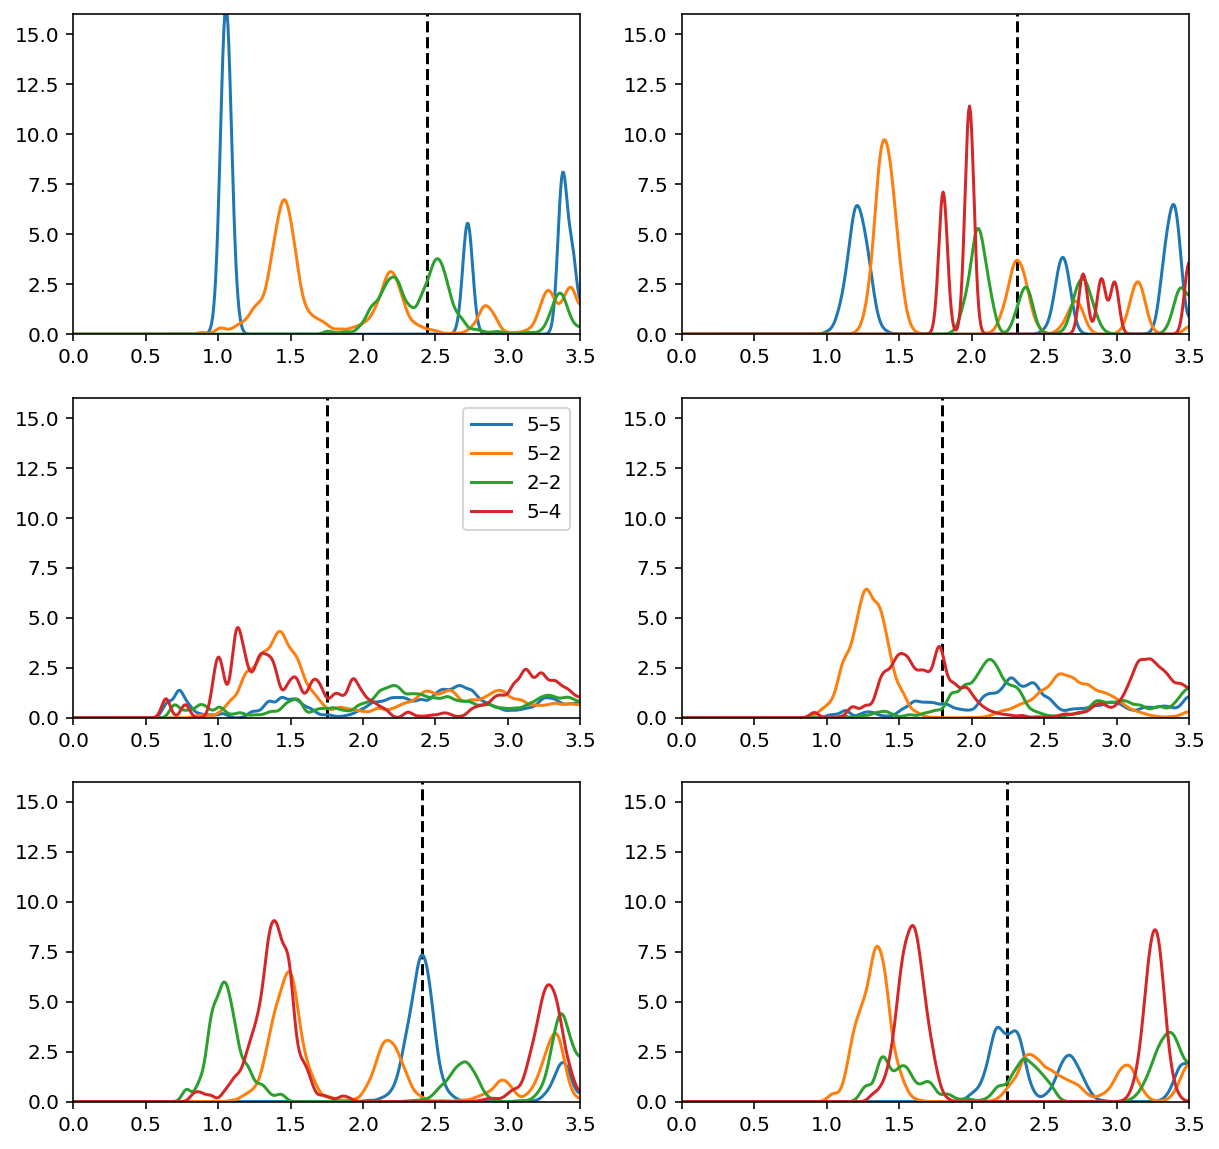

In [11]:
from vasppy.rdf import RadialDistributionFunction
from pymatgen import PeriodicSite
from pymatgen import Structure
    
atoms = { '1': 'Ca',
          '2': 'Na',
          '4': 'K',
          '5': 'Li' }

r_max = 3.5

fig, ax = plt.subplots(3,2,figsize=(10,10))

for axx, disorder in zip(ax, ['0p', '50p', '100p']):
    for axes, system in zip(axx, ['Li6PS5I', 'Li6PS5Cl']):

        a = analysis[system][disorder]
        latt = lattice[system][disorder] 

        new_sites = []

        for s in a.sites:
            if s.points:
                points = np.array([pbc_nearest_point(s.centre(), p) for p in s.points])
                new_sites.append(PeriodicSite(coords=np.mean(points, axis=0), 
                                              atoms_n_occu=atoms[s.label], lattice=latt))

        li_struct = Structure.from_sites(new_sites)
        elements = set( [ s.species_string for s in new_sites ] )
        r_perc = minimum_percolating_graph(structure=li_struct,
                                           elements=elements,
                                           r_min=0.1,
                                           r_max=3.0,
                                           func=percolating_graph,
                                           verbose=False)['x']

        rdf_data = {}

        li_indices = indices_by_species( li_struct, 'Li' )
        na_indices = indices_by_species( li_struct, 'Na' )
        k_indices = indices_by_species( li_struct, 'K' )

        rdf_data['55'] = RadialDistributionFunction( [li_struct], li_indices, li_indices, r_max=r_max )
        rdf_data['52'] = RadialDistributionFunction( [li_struct], li_indices, na_indices, r_max=r_max )
        rdf_data['22'] = RadialDistributionFunction( [li_struct], na_indices, na_indices, r_max=r_max )
        if k_indices:
            rdf_data['54'] = RadialDistributionFunction( [li_struct], li_indices, k_indices, r_max=r_max )
            rdf_data['24'] = RadialDistributionFunction( [li_struct], na_indices, k_indices, r_max=r_max )

        sigma = 0.03

        axes.plot(rdf_data['55'].r, rdf_data['55'].smeared_rdf(sigma=sigma), label='5–5')
        axes.plot(rdf_data['52'].r, rdf_data['52'].smeared_rdf(sigma=sigma), label='5–2')
        axes.plot(rdf_data['22'].r, rdf_data['22'].smeared_rdf(sigma=sigma), label='2–2')
        if k_indices:
            axes.plot(rdf_data['54'].r, rdf_data['54'].smeared_rdf(sigma=sigma), label='5–4')
            
        axes.set_ylim([0,16])
        axes.set_xlim([0,r_max])
        axes.vlines(r_perc, 0, 16, linestyles='dashed')
ax[1][0].legend()
plt.show()

In [31]:
rdf_data = {}
r_perc = {}
i=-1
for disorder in ['0p', '50p', '100p']:
    for system in ['Li6PS5I', 'Li6PS5Cl']:
        if not system in rdf_data:
            rdf_data[system] = {}
            r_perc[system] = {}
        rdf_data[system][disorder] = {}
        r_perc[system][disorder] = {}

        a = analysis[system][disorder]
        latt = lattice[system][disorder] 

        new_sites = []

        for s in a.sites:
            if s.points:
                points = np.array([pbc_nearest_point(s.centre(), p) for p in s.points])
                new_sites.append(PeriodicSite(coords=np.mean(points, axis=0), 
                                              atoms_n_occu=atoms[s.label], lattice=latt))

        li_struct = Structure.from_sites(new_sites)
        elements = set( [ s.species_string for s in new_sites ] )
        r_perc[system][disorder] = minimum_percolating_graph(structure=li_struct,
                                                             elements=elements,
                                                             r_min=0.1,
                                                             r_max=3.0,
                                                             func=percolating_graph,
                                                             verbose=False)['x']

        li_indices = indices_by_species( li_struct, 'Li' )
        na_indices = indices_by_species( li_struct, 'Na' )
        k_indices = indices_by_species( li_struct, 'K' )

        rdf_data[system][disorder]['55'] = RadialDistributionFunction(
            [li_struct], li_indices, li_indices, r_max=r_max)
        rdf_data[system][disorder]['52'] = RadialDistributionFunction(
            [li_struct], li_indices, na_indices, r_max=r_max)
        rdf_data[system][disorder]['22'] = RadialDistributionFunction(
            [li_struct], na_indices, na_indices, r_max=r_max)
        if k_indices:
            rdf_data[system][disorder]['54'] = RadialDistributionFunction(
                [li_struct], li_indices, k_indices, r_max=r_max)
            rdf_data[system][disorder]['24'] = RadialDistributionFunction(
                [li_struct], na_indices, k_indices, r_max=r_max)


/Users/bjm42/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Users/bjm42/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


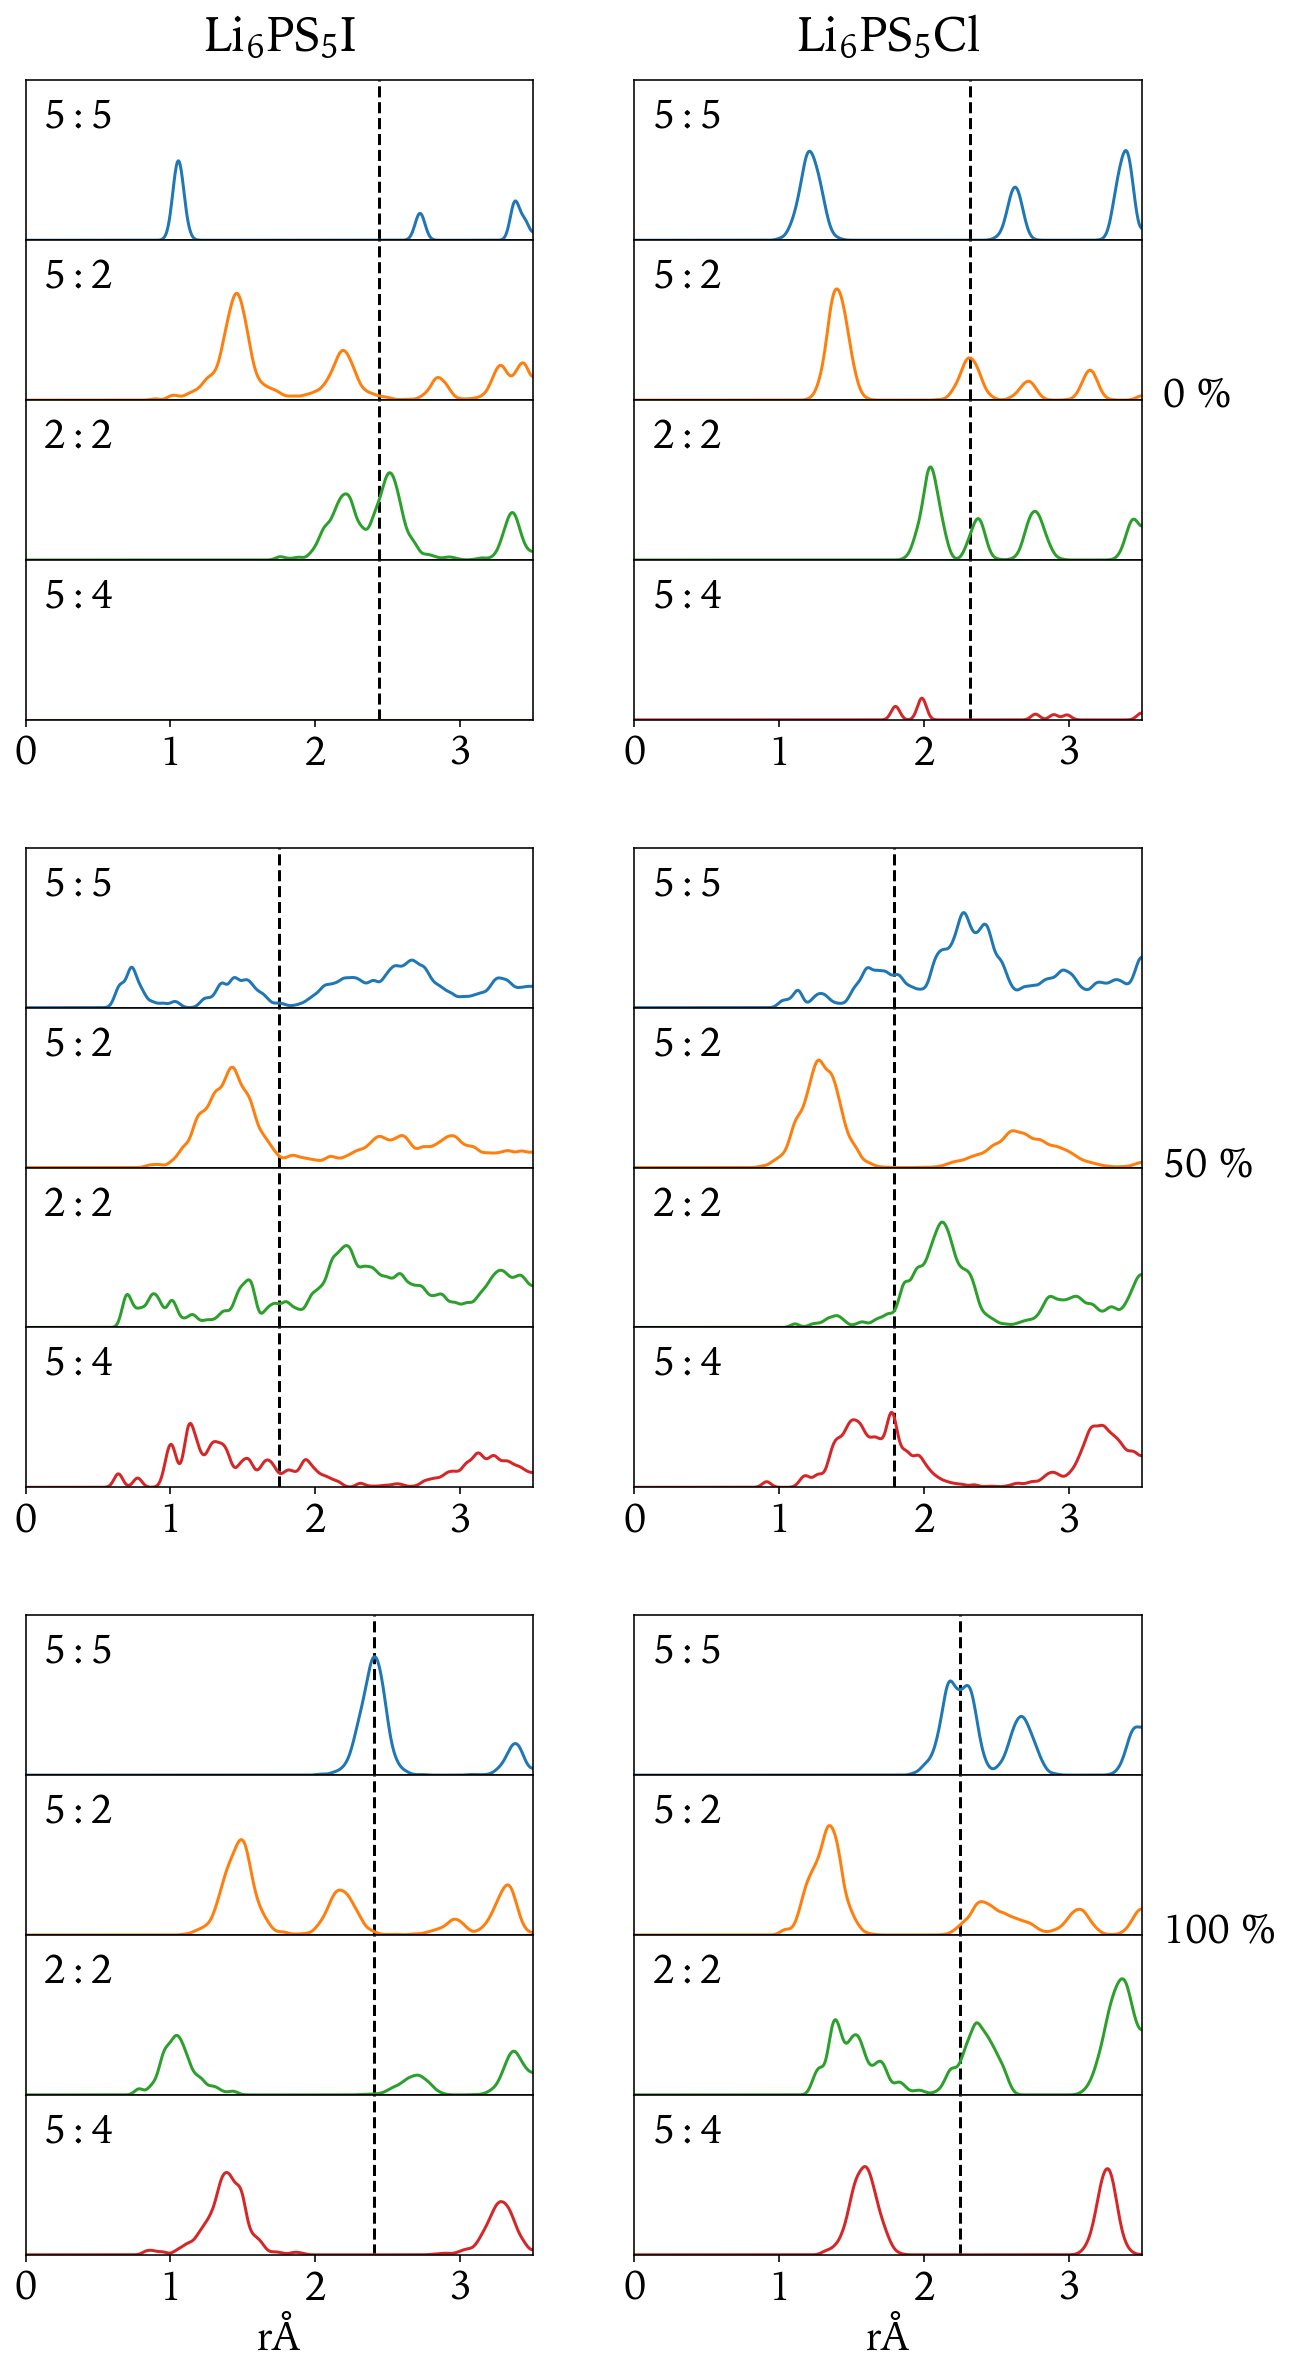

In [102]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 20))
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2)

j_map = {0: '55',
         1: '52',
         2: '22',
         3: '54'}

labels = {'55': '5-5',
          '52': '5-2',
          '22': '2-2',
          '54': '5-4'}

colours = {'55': '#1f77b4',
           '52': '#ff7f0e',
           '22': '#2ca02c',
           '54': '#d62728'}

sigma = 0.03

i=-1
for disorder in ['0p', '50p', '100p']:
    for system in ['Li6PS5I', 'Li6PS5Cl']:
        i += 1
        inner = gridspec.GridSpecFromSubplotSpec(4, 1,
                        subplot_spec=outer[i], wspace=0.1, hspace=0.0)
                
        for j in range(4):
            axes = plt.Subplot(fig, inner[j])
            k = j_map[j]
            try:
                rdf = rdf_data[system][disorder][k]
                axes.plot(rdf.r, rdf.smeared_rdf(sigma=sigma), 
                          label=labels[k], c=colours[k])
                y_max = rdf.rdf.max()*1.1
            except:
                x = np.linspace(0,r_max)
                y = np.zeros_like(x)
                axes.plot(x,y, c=colours[k])
                y_max = 1.0
            axes.vlines(r_perc[system][disorder], 0, y_max, linestyles='dashed')
            axes.set_yticks([])
            if j in [0,1,2]:
                axes.set_xticks([])
            axes.set_xlim([0,r_max])
            axes.set_ylim([0,y_max])
            fig.add_subplot(axes)
            if i in [4,5]:
                if j == 3:
                    axes.set_xlabel(r'$r$$\mathrm{\AA}$')
            if i == 0:
                if j == 0:
                    axes.set_title(r'Li$_6$PS$_5$I', pad=15)
            if i == 1:
                if j == 0:
                    axes.set_title(r'Li$_6$PS$_5$Cl', pad=15)
                if j == 1:
                    axes.text(3.65,-0.5,'0 %')
            if i == 3:
                if j == 1:
                    axes.text(3.65,-0.5,'50 %')
            if i == 5:
                if j == 1:
                    axes.text(3.65,-0.5,'100 %')
            if j == 0:
                axes.text(0.12,y_max*0.7,r'$5:5$')
            if j == 1:
                axes.text(0.12,y_max*0.7,r'$5:2$')
            if j == 2:
                axes.text(0.12,y_max*0.7,r'$2:2$')
            if j == 3:
                axes.text(0.12,y_max*0.7,r'$5:4$')
fig.tight_layout()
fig.show()

In [103]:
fig.savefig('../../figures/site_rdf.pdf', bbox_inches='tight')